In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_bs1 = pd.read_csv('../data/preprocessed_data_BS1.csv')
data_bs1.head()

,hg38_ASF1A,hg38_CCT7,hg38_EPOR,hg38_NECAP2,hg38_LRRC8A,hg38_NDUFS8,hg38_MRPL22,hg38_HIST1H2BC,hg38_LY96,hg38_UBE2E2-AS1,...,hg38_TMEM128,hg38_ASPSCR1,hg38_CDC20,hg38_DNAJB9,hg38_OSTM1,hg38_LCNL1,hg38_PHB,hg38_LRRC29,hg38_ZFP36,Group
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
1,0,0,0,3,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,3,B
3,0,0,0,0,0,3,0,0,0,0,...,0,0,0,3,0,0,3,0,0,B
4,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B


In [3]:
X = data_bs1.drop(['Group'], axis=1)
y = data_bs1['Group']

In [4]:
y.unique()

array(['B', 'D', 'M', 'NK', 'T'], dtype=object)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [6]:
def model_info(y_real, y_pred, labels=['B', 'D', 'M', 'NK', 'T']):
    cm = confusion_matrix(y_real, y_pred)
    class_sums = cm.sum(axis=1)
    normalized_conf_matrix = cm / class_sums[:, np.newaxis]
    sns.heatmap(normalized_conf_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels, fmt='.2f')
    plt.xlabel('Predvidjene vrednosti')
    plt.ylabel('Stvarne vrednosti')
    plt.title('Matrica konfuzije')
    plt.show()

    print('Matrica konfuzije: \n', cm)
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred, average='weighted', zero_division=0))
    print('Recall score: ', recall_score(y_real, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_real, y_pred, average='weighted'))

In [7]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)

    return model

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)

c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


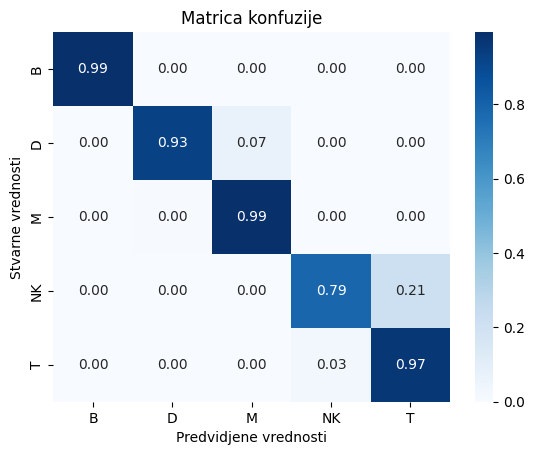

Matrica konfuzije: 
 [[ 514    1    1    0    2]
 [   0   38    3    0    0]
 [   1    2  493    0    0]
 [   1    0    0  308   83]
 [   1    0    1   82 2424]]
Accuracy score:  0.9549936788874842
Precision score:  0.9548995304252595
Recall score:  0.9549936788874842
F1 score:  0.9549454445428811


In [10]:
model = build_model(model, X_train, X_test, y_train, y_test)

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'solver': ['sag', 'lbfgs'],
}

grid_search_l2 = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5, verbose=2)

grid_search_l2.fit(X_train, y_train)

best_params_l2 = grid_search_l2.best_params_
best_score_l2 = grid_search_l2.best_score_

best_model_l2 = LogisticRegression(**best_params_l2)
best_model_l2.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=  31.9s
[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=  31.9s
[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=  29.7s
[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=  34.3s
[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=  32.6s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   7.3s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   7.4s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   7.5s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   7.3s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   7.7s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.01, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.01, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.01, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.01, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.01, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   7.6s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   7.4s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   7.4s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   7.4s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   7.5s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   7.6s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   7.5s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   7.6s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   7.5s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   7.2s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   7.7s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   7.3s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   7.4s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   7.2s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   7.4s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   7.4s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   7.3s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   7.4s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   7.4s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   7.4s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=100, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   7.5s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   7.5s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   7.3s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   7.5s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   7.9s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1000, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1000, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1000, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1000, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1000, penalty=l2, solver=sag; total time= 1.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   7.2s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   7.3s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   7.3s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   7.2s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=1000, penalty=l2, solver=lbfgs; total time=   7.4s


LogisticRegression(C=0.001, solver='sag')

In [12]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],
}

grid_search_all = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5, verbose=2)

grid_search_all.fit(X_train, y_train)

best_params_all = grid_search_all.best_params_
best_score_all = grid_search_all.best_score_

best_model_all = LogisticRegression(**best_params_all)
best_model_all.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=0.001, penalty=l1, solver=saga; total time= 2.4min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=0.001, penalty=l1, solver=saga; total time= 2.4min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=0.001, penalty=l1, solver=saga; total time= 2.4min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=0.001, penalty=l1, solver=saga; total time= 2.4min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=0.001, penalty=l1, solver=saga; total time= 2.4min
[CV] END ...................C=0.001, penalty=l2, solver=saga; total time=  45.5s
[CV] END ...................C=0.001, penalty=l2, solver=saga; total time=  46.5s
[CV] END ...................C=0.001, penalty=l2, solver=saga; total time=  46.4s
[CV] END ...................C=0.001, penalty=l2, solver=saga; total time=  48.4s
[CV] END ...................C=0.001, penalty=l2, solver=saga; total time=  47.2s
[CV] END ...........C=0.001, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...........C=0.001, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...........C=0.001, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...........C=0.001, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...........C=0.001, penalty=elasticnet, solver=saga; total time=   0.1s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l1, solver=saga; total time= 2.5min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l1, solver=saga; total time= 2.5min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l1, solver=saga; total time= 2.5min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l1, solver=saga; total time= 2.5min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l1, solver=saga; total time= 2.5min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.01, penalty=l2, solver=saga; total time= 1.6min
[CV] END ............C=0.01, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ............C=0.01, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ............C=0.01, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ............C=0.01, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ............C=0.01, penalty=elasticnet, solver=saga; total time=   0.1s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 2.9min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 2.9min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 2.9min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 2.9min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time= 2.9min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time= 1.6min
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.1s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 4.8min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 4.8min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 4.8min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 4.8min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 4.9min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 1.6min
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.1s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time= 7.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time= 7.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time= 7.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time= 7.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time= 7.3min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 1.6min
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.1s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time= 6.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time= 6.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time= 6.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time= 6.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l1, solver=saga; total time= 6.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=100, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=100, penalty=l2, solver=saga; total time=427.5min
[CV] END .............C=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .............C=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .............C=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .............C=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .............C=100, penalty=elasticnet, solver=saga; total time=   0.1s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time= 6.1min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time= 6.1min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time= 6.1min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time= 6.1min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l1, solver=saga; total time= 6.1min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l2, solver=saga; total time= 1.6min


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1000, penalty=l2, solver=saga; total time= 1.6min
[CV] END ............C=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ............C=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ............C=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ............C=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ............C=1000, penalty=elasticnet, solver=saga; total time=   0.1s


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\stefa\AppDa

LogisticRegression(C=0.001, solver='saga')

In [13]:
best_params_l2, best_score_l2

({'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}, 0.9547022053102439)

In [14]:
best_params_all, best_score_all

({'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}, 0.9547022053102439)

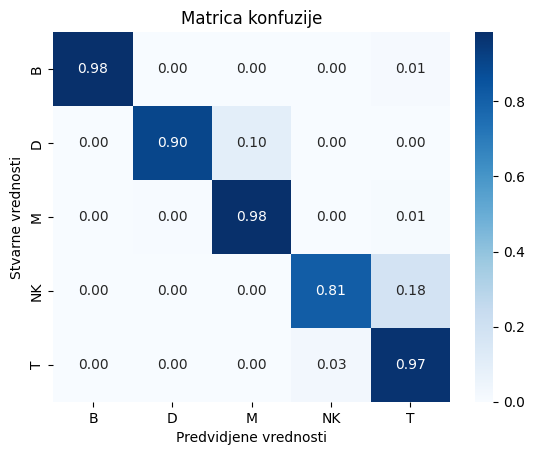

Matrica konfuzije: 
 [[ 510    1    1    0    6]
 [   0   37    4    0    0]
 [   1    2  488    0    5]
 [   1    0    0  319   72]
 [   1    0    1   75 2431]]
Accuracy score:  0.9570164348925411
Precision score:  0.9571302832080821
Recall score:  0.9570164348925411
F1 score:  0.9570669659146012


LogisticRegression(C=0.001, solver='sag')

In [9]:
best_params = {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
best_model = LogisticRegression(**best_params)
build_model(best_model, X_train, X_test, y_train, y_test)

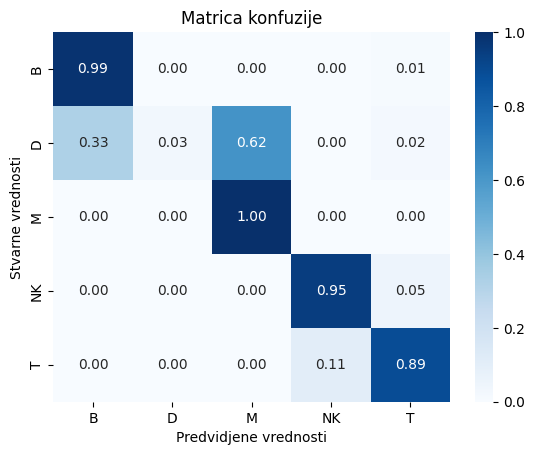

Matrica konfuzije: 
 [[1855    0    1    6   15]
 [  88    9  167    0    6]
 [   0    0 2006    0    0]
 [   0    0    0  796   46]
 [   1    0    7  760 6383]]
Accuracy score:  0.909682199901202
Precision score:  0.9395614352738949
Recall score:  0.909682199901202
F1 score:  0.908252011638256


In [19]:
data = pd.read_csv('../data/preprocessed_data_BS2.csv')

X = data.drop(['Group'], axis=1)
y = data['Group']

y_pred = best_model.predict(X)
model_info(y, y_pred)

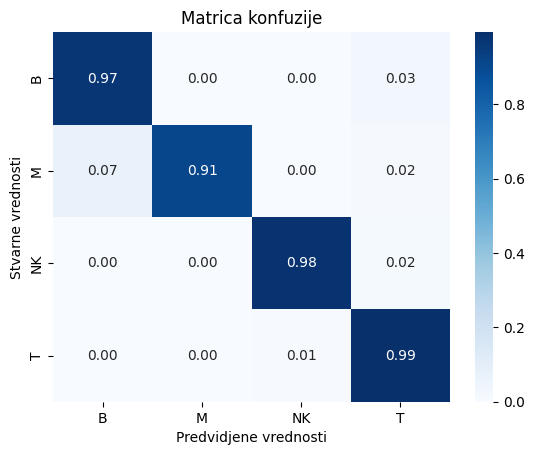

Matrica konfuzije: 
 [[ 9442     0     0   283]
 [  134  1683     3    28]
 [    0     1  8031   147]
 [   28     0   316 62332]]
Accuracy score:  0.9885961081186004
Precision score:  0.9886595081320483
Recall score:  0.9885961081186004
F1 score:  0.9885661820575417


In [27]:
data = pd.read_csv('../data/preprocessed_data_10x.csv')

X = data.drop(['Group'], axis=1)
y = data['Group']

y_pred = best_model.predict(X)
model_info(y, y_pred)

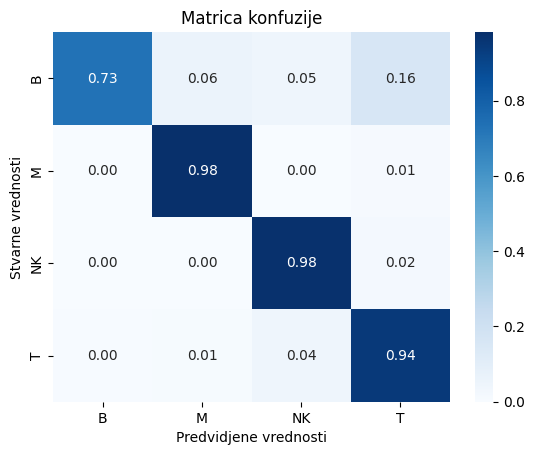

Matrica konfuzije: 
 [[ 1286   106    83   281]
 [    1   841     3    11]
 [    0     0   302     7]
 [   58   110   581 12735]]
Accuracy score:  0.9243523316062177
Precision score:  0.9528208563083773
Recall score:  0.9243523316062177
F1 score:  0.9330219362399712


In [30]:
data = pd.read_csv('../data/preprocessed_data_GEO.csv')

X = data.drop(['Group'], axis=1)
y = data['Group']

y_pred = best_model.predict(X)
model_info(y, y_pred)

c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


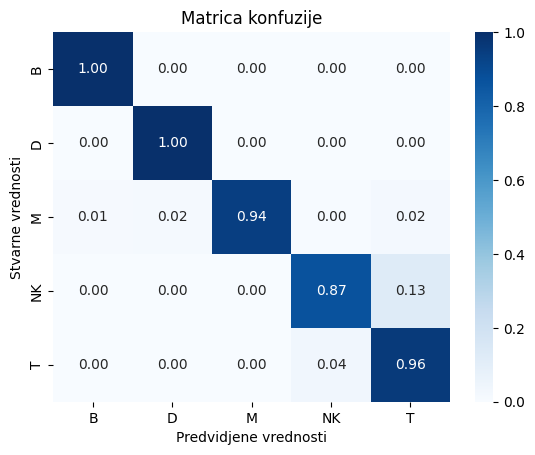

Matrica konfuzije: 
 [[ 517    1    0    0    0]
 [   0   41    0    0    0]
 [   6    9  468    2   11]
 [   1    0    0  341   50]
 [   5    3    0   90 2410]]
Accuracy score:  0.9549936788874842
Precision score:  0.95781974160571
Recall score:  0.9549936788874842
F1 score:  0.9558820928155255


LogisticRegression(C=0.001, class_weight='balanced', solver='sag')

In [14]:
cw_params = {'C': 0.001, 'penalty': 'l2', 'solver': 'sag', 'class_weight' : 'balanced'}
model_cw = LogisticRegression(**cw_params)
build_model(model_cw, X_train, X_test, y_train, y_test)

In [6]:
def load_test(path, model, classes=['B', 'D', 'M', 'NK', 'T']):
    data = pd.read_csv(path)

    X = data.drop(['Group'], axis=1)
    y = data['Group']

    y_pred = model.predict(X)
    model_info(y, y_pred, labels=classes)

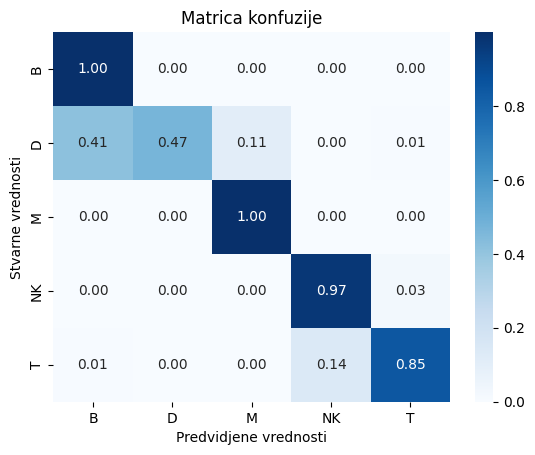

Matrica konfuzije: 
 [[1876    0    0    1    0]
 [ 112  127   29    0    2]
 [   0    1 2004    0    1]
 [   1    0    0  818   23]
 [  47    0    7 1027 6070]]
Accuracy score:  0.8970031286020089
Precision score:  0.9436516796007639
Recall score:  0.8970031286020089
F1 score:  0.9077168113397402


In [19]:
load_test('../data/preprocessed_data_BS2.csv', model_cw)

C:\Users\stefa\AppData\Local\Temp\ipykernel_12076\1494971208.py:4: RuntimeWarning: invalid value encountered in divide
  normalized_conf_matrix = cm / class_sums[:, np.newaxis]


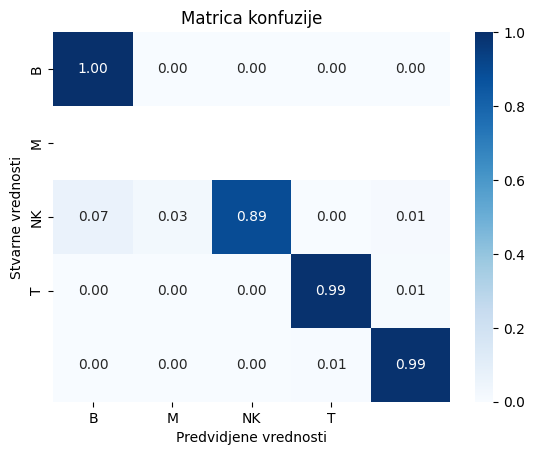

Matrica konfuzije: 
 [[ 9725     0     0     0     0]
 [    0     0     0     0     0]
 [  125    48  1649     4    22]
 [    1     0     0  8084    94]
 [   77     6     0   463 62130]]
Accuracy score:  0.9898092881059835
Precision score:  0.9907515124636017


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score:  0.9898092881059835
F1 score:  0.9901428531809175


In [27]:
load_test('../data/preprocessed_data_10x.csv', model_cw)

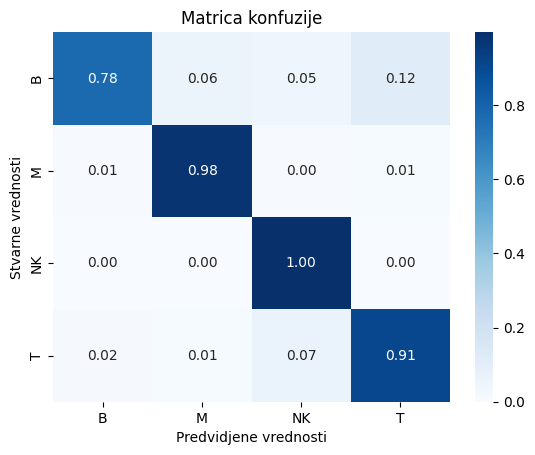

Matrica konfuzije: 
 [[ 1367   104    81   204]
 [    6   838     4     8]
 [    0     0   308     1]
 [  208   121   904 12251]]
Accuracy score:  0.8999695214873514
Precision score:  0.9460575861354811
Recall score:  0.8999695214873514
F1 score:  0.9166348398491051


In [28]:
load_test('../data/preprocessed_data_GEO.csv', model_cw)

In [7]:
def load_and_build_model(path):
    data = pd.read_csv(path)
    X = data.drop(['Group'], axis=1)
    y = data['Group']
    params = {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
    cw_params = {'C': 0.001, 'penalty': 'l2', 'solver': 'sag', 'class_weight' : 'balanced'}
    model = LogisticRegression(**params)
    model_cw = LogisticRegression(**cw_params)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)
    build_model(model, X_train, X_test, y_train, y_test)
    build_model(model_cw, X_train, X_test, y_train, y_test)

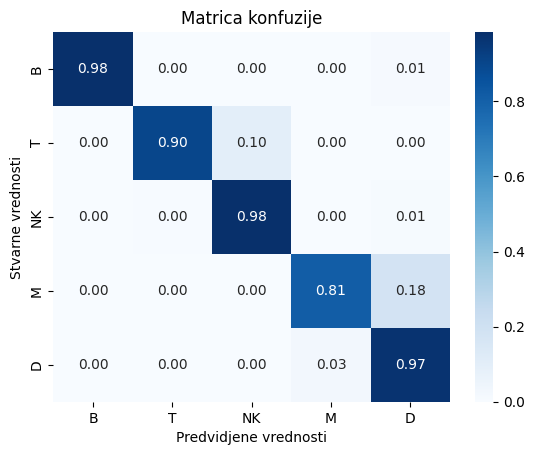

Matrica konfuzije: 
 [[ 510    1    1    0    6]
 [   0   37    4    0    0]
 [   1    2  488    0    5]
 [   1    0    0  319   72]
 [   1    0    1   74 2432]]
Accuracy score:  0.9572692793931732
Precision score:  0.9573428009653193
Recall score:  0.9572692793931732
F1 score:  0.9572997209896353


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


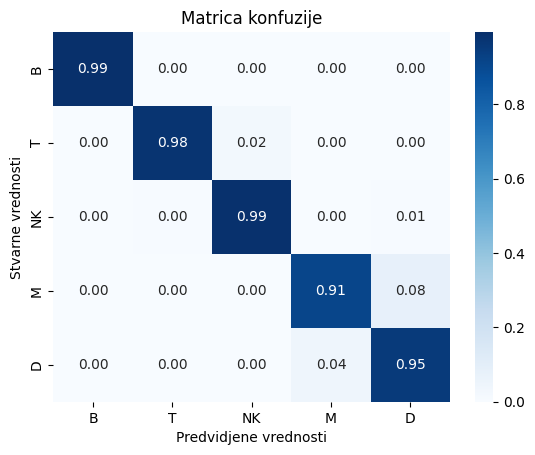

Matrica konfuzije: 
 [[ 515    1    1    0    1]
 [   0   40    1    0    0]
 [   1    2  490    0    3]
 [   1    0    0  358   33]
 [   2    0    1  111 2394]]
Accuracy score:  0.9600505689001264
Precision score:  0.9643946703743058
Recall score:  0.9600505689001264
F1 score:  0.9614017759090413


In [8]:
load_and_build_model('../data/preprocessed_data_BS1.csv')

c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


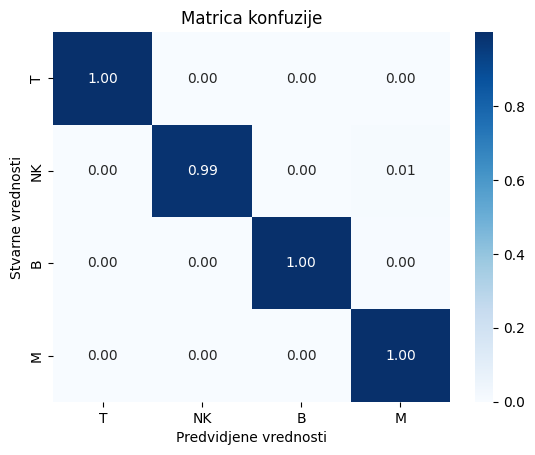

Matrica konfuzije: 
 [[ 2950     0     0     1]
 [    2   530     0     5]
 [    0     0  2407    10]
 [    3     1     2 18818]]
Accuracy score:  0.9990294795584131
Precision score:  0.999029371275382
Recall score:  0.9990294795584131
F1 score:  0.999028368911919


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


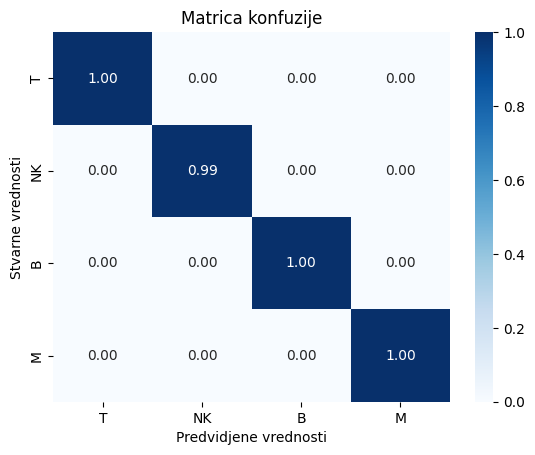

Matrica konfuzije: 
 [[ 2951     0     0     0]
 [    1   534     0     2]
 [    0     0  2414     3]
 [    4     7     6 18807]]
Accuracy score:  0.999069917910146
Precision score:  0.9990725246449599
Recall score:  0.999069917910146
F1 score:  0.9990707247650525


In [9]:
load_and_build_model('../data/preprocessed_data_10x.csv')

c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


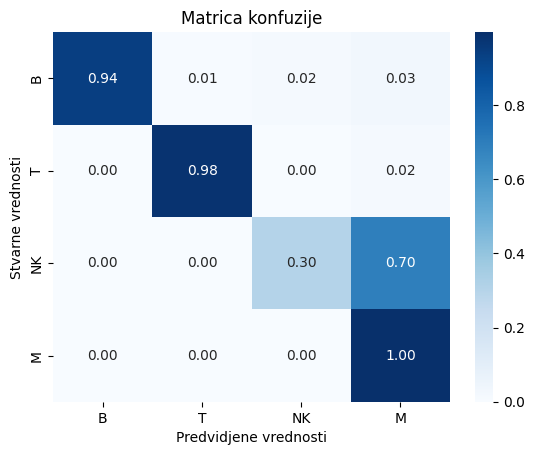

Matrica konfuzije: 
 [[ 485    4   10   17]
 [   0  258    0    5]
 [   0    0   24   55]
 [   5    9    0 4050]]
Accuracy score:  0.9786672084518488
Precision score:  0.9762410795798541
Recall score:  0.9786672084518488
F1 score:  0.9760416704809484


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


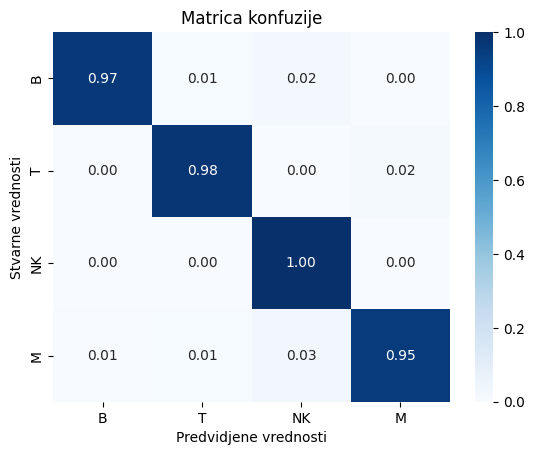

Matrica konfuzije: 
 [[ 499    5   11    1]
 [   1  257    0    5]
 [   0    0   79    0]
 [  21   40  126 3877]]
Accuracy score:  0.9573344169036977
Precision score:  0.9761552678941487
Recall score:  0.9573344169036977
F1 score:  0.9637277913859454


In [10]:
load_and_build_model('../data/preprocessed_data_GEO.csv')

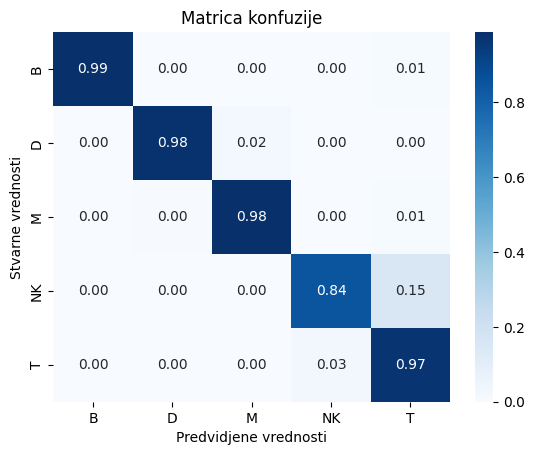

Matrica konfuzije: 
 [[ 511    1    1    0    5]
 [   0   40    1    0    0]
 [   1    2  488    0    5]
 [   1    0    0  331   60]
 [   1    0    1   78 2428]]
Accuracy score:  0.9603034134007585
Precision score:  0.9610739489993526
Recall score:  0.9603034134007585
F1 score:  0.9606385810339292


LogisticRegression(C=0.001, solver='sag')

In [7]:
train_data = pd.read_csv('../data/oversampled_train_BS1.csv')
X_train = train_data.drop(['Group'], axis=1)
y_train = train_data['Group']
test_data = pd.read_csv('../data/oversampled_test_BS1.csv')
X_test = test_data.drop(['Group'], axis=1)
y_test = test_data['Group']
params = {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
model = LogisticRegression(**params)
build_model(model, X_train, X_test, y_train, y_test)

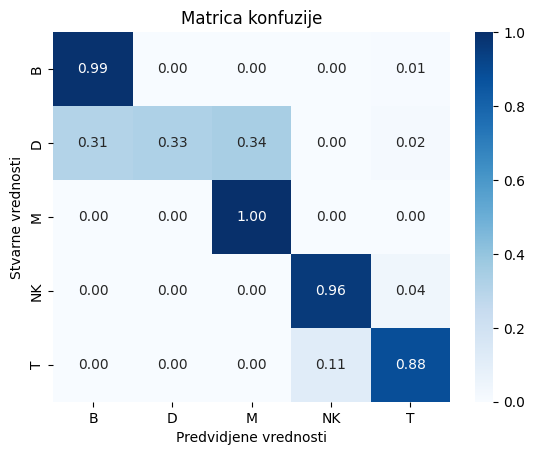

Matrica konfuzije: 
 [[1858    0    1    7   11]
 [  84   88   93    0    5]
 [   0    0 2006    0    0]
 [   0    0    0  809   33]
 [   3    0    7  822 6319]]
Accuracy score:  0.9122344804874033
Precision score:  0.9455555526337226
Recall score:  0.9122344804874033
F1 score:  0.9178943263994326


In [8]:
load_test('../data/preprocessed_data_BS2.csv', model)

C:\Users\stefa\AppData\Local\Temp\ipykernel_13492\1779981008.py:4: RuntimeWarning: invalid value encountered in divide
  normalized_conf_matrix = cm / class_sums[:, np.newaxis]


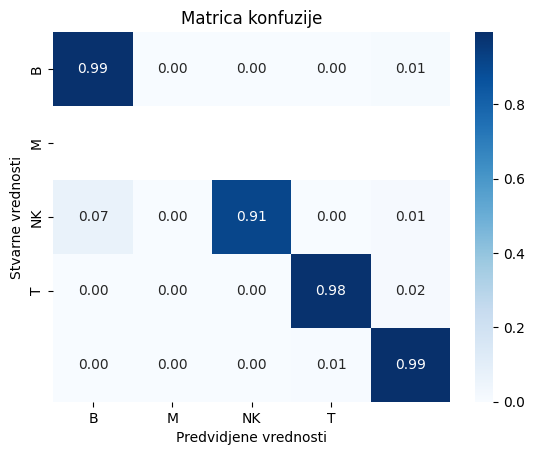

Matrica konfuzije: 
 [[ 9622     0     0     0   103]
 [    0     0     0     0     0]
 [  135     3  1681     3    26]
 [    0     0     1  8053   125]
 [   32     0     0   359 62285]]
Accuracy score:  0.9904522734992963
Precision score:  0.990617133400662


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score:  0.9904522734992963
F1 score:  0.9904657389994904


In [9]:
load_test('../data/preprocessed_data_10x.csv', model, classes=['B', 'M', 'NK', 'T'])

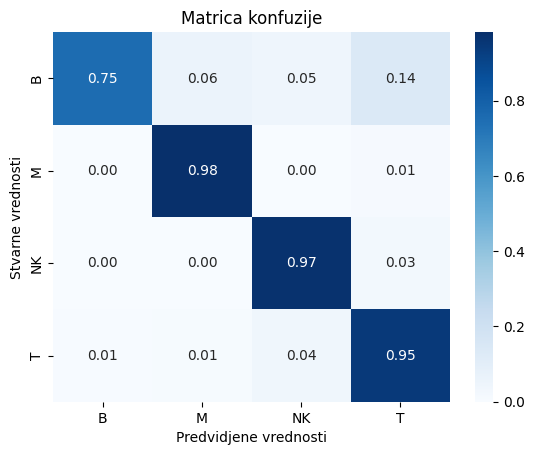

Matrica konfuzije: 
 [[ 1324   106    82   244]
 [    2   841     2    11]
 [    0     0   301     8]
 [   72   111   526 12775]]
Accuracy score:  0.9290460225540994
Precision score:  0.9544394969596464
Recall score:  0.9290460225540994
F1 score:  0.9368379349820551


In [10]:
load_test('../data/preprocessed_data_GEO.csv', model, classes=['B', 'M', 'NK', 'T'])